# Introduction to Feature Extraction

``Feature Extraction`` in image processing is a process of extracting the most important features from an
image to represent it in a compact form. The extracted features can be used for various purposes like
image recognition, image classification, object detection, etc. The features of images are categorized into
three types: low-level features, mid-level features, and high-level features.

1. ``Low-level features``: These features are extracted from the raw pixel values of the image. They are
    simple features like color, texture, shape, etc.
    
2. ``Mid-level features``: These features are extracted from the low-level features. They are more
    complex features like edges, corners, etc.
    
3. ``High-level features``: These features are extracted from the mid-level features. They are the most
    complex features like objects, faces, etc.

# Setup

In [ ]:
%pip install opencv-python opencv-contrib-python matplotlib scikit-image scikit-learn

# Initial Setup

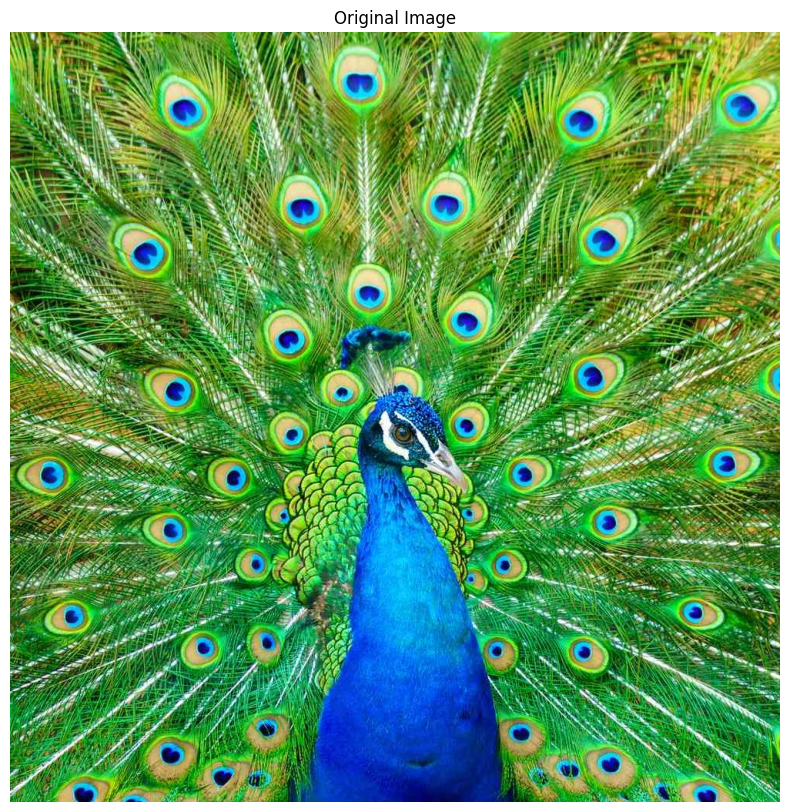

In [88]:
# Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from sklearn.cluster import KMeans

# Asset Root
asset_root = os.path.join(os.getcwd(), '../../assets')

# Image Path
image_path = os.path.join(asset_root, 'images', 'peacock.jpg')

# Read Image and convert to RGB
input_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Display Both Image
plt.figure("Feature Extraction", figsize=(10, 10))

plt.subplot(1, 1, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.show()

# Low-Level Features

``Low-level features`` are the basic features of an image that are extracted directly from the image. These
features are extracted from the pixel values of the image. Some of the low-level features are:

1. Color Features
2. Texture Features
3. Shape Features 

## Color Features

``Color Features`` are the features that are extracted from the color of the image. The color features can be
extracted using the color histogram, color moments, color spaces, color correlograms, or dominant color
descriptors. The color features are used in image retrieval, image classification, and object detection.

### Color Histogram

``Color Histogram`` is a graphical representation of the distribution of colors in an image. The color
histogram is used to represent the color distribution of an image. The color histogram is used to extract the
color features of an image. The color histogram is used in image retrieval, image classification, and object
detection.

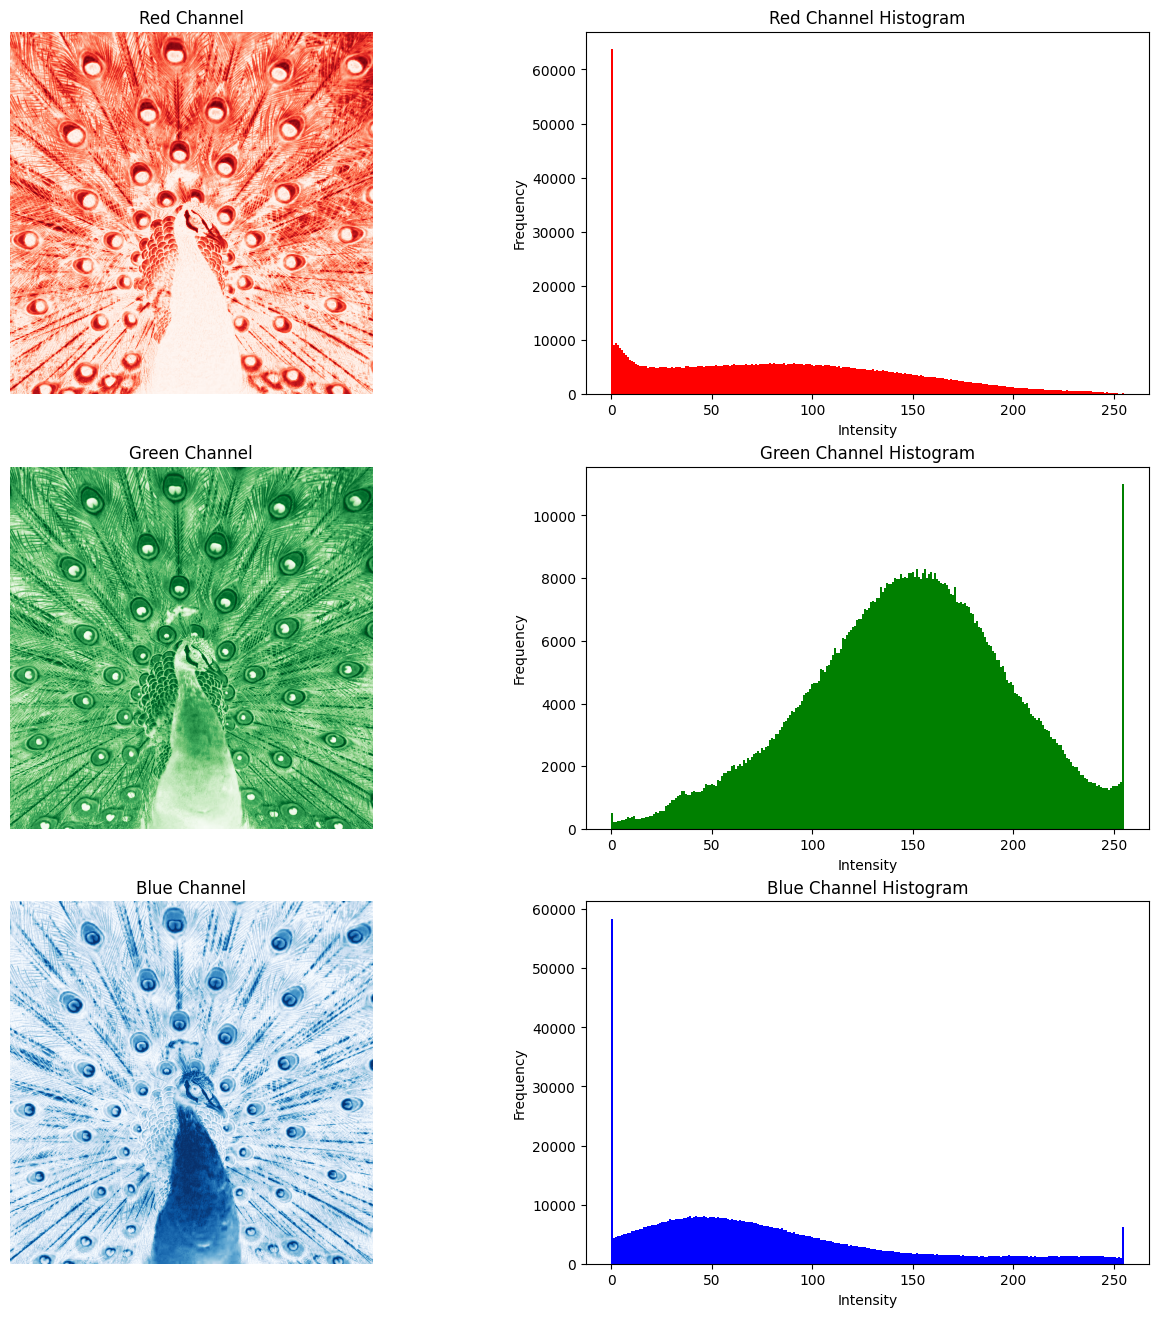

In [89]:
# Separate the RGB Channels
channel_r, channel_g, channel_b = cv2.split(input_image)

plt.figure("Feature Extraction", figsize=(16, 16))

plt.subplot(3, 2, 1)
plt.imshow(channel_r, cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(channel_r.ravel(), bins=256, color='red')
plt.title("Red Channel Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(3, 2, 3)
plt.imshow(channel_g, cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(channel_g.ravel(), bins=256, color='green')
plt.title("Green Channel Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(3, 2, 5)
plt.imshow(channel_b, cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(channel_b.ravel(), bins=256, color='blue')
plt.title("Blue Channel Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.show()

### Color Moments
    
``Color Moments`` are the statistical features that are used to represent the color distribution of an image.
The color moments are used to extract the color features of an image. Color moments include the:

1. ``Mean`` - The average value of the color distribution.
2. ``Variance`` - The spread of the color distribution.
3. ``Skewness`` - The asymmetry of the color distribution.

In [90]:
# Calculate Color Moments
def color_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h_channel, s_channel, v_channel = cv2.split(image)
    
    moments = []
    for channel in [h_channel, s_channel, v_channel]:
        mean = np.mean(channel)
        std = np.std(channel)
        skewness = np.mean((channel - mean) ** 3) / (std ** 3)
        moments.extend([mean, std, skewness])
        
    return moments

moments = color_moments(input_image)
print("Color Moments:", moments)

Color Moments: [57.379494, 21.226194578962193, 1.1699422760723697, 176.32906, 58.4086775874647, -0.39189914442907947, 157.944093, 48.03572330471719, 0.00401047779362295]


### Color Spaces

``Color Spaces`` are the different color models that are used to represent the color of an image. The color
spaces are used to extract the color features of an image.

### Color Correlogram

``Color Correlogram`` is a graphical representation of the spatial correlation of colors in an image. The color
correlogram is used to represent the spatial correlation of colors in an image. The color correlogram is used
to extract the color features of an image.

### Dominant Color Descriptors

``Dominant Color Descriptors`` are the most dominant colors in an image. The dominant color descriptors are
used to represent the dominant colors in an image. The dominant color descriptors are used in image retrieval,
image classification, and object detection.

Dominant Colors: [[112  93 165]
 [ 91 151  68]
 [183  95 165]]


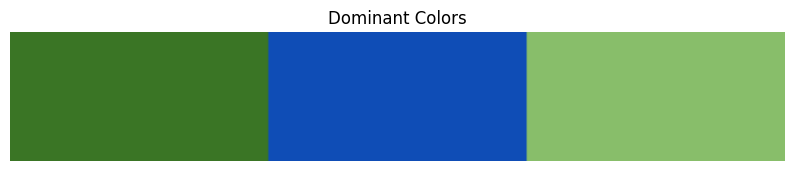

In [91]:
def find_dominant_colors(image, k=3):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    pixels = image.reshape(-1, 3)
    
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(pixels)
    
    colors = kmeans.cluster_centers_
    
    colors = colors.astype(int)
    
    return colors

def plot_colors(colors):
    bar = np.zeros((50, 300, 3), dtype='uint8')
    start_x = 0
    
    for color in colors:
        end_x = start_x + 300 // len(colors)
        cv2.rectangle(bar, (start_x, 0), (end_x, 50), color.tolist(), -1)
        start_x = end_x
        
    return bar

dominant_colors = find_dominant_colors(input_image, k=3)
print("Dominant Colors:", dominant_colors)

dominant_colors_bar = plot_colors(dominant_colors)

# Convert to RGB
dominant_colors_bar = cv2.cvtColor(dominant_colors_bar, cv2.COLOR_LAB2RGB)

plt.figure("Feature Extraction", figsize=(10, 5))

plt.imshow(dominant_colors_bar)
plt.title("Dominant Colors")
plt.axis('off')

plt.show()

## Texture Features

``Texture Features`` are the features that are extracted from the texture of the image. The texture features are
used to represent the texture of an image. The texture features can be extracted using the gray-level
co-occurrence matrix (GLCM), gray-level run-length matrix (GLRLM), gray-level difference matrix (GLDM),
and local binary pattern (LBP). The texture features are used in image retrieval, image classification, and
object detection.

In [92]:
# Calculate GLCM Features
def calculate_glcm_features(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    
    # Calculate Texture Features
    contrast = graycoprops(glcm, prop='contrast')[0][0]
    dissimilarity = graycoprops(glcm, prop='dissimilarity')[0][0]
    homogeneity = graycoprops(glcm, prop='homogeneity')[0][0]
    energy = graycoprops(glcm, prop='energy')[0][0]
    correlation = graycoprops(glcm, prop='correlation')[0][0]
    asm = graycoprops(glcm, prop='ASM')[0][0]
    
    features = {
        'contrast': contrast,
        'dissimilarity': dissimilarity,
        'homogeneity': homogeneity,
        'energy': energy,
        'correlation': correlation,
        'ASM': asm
    }
    
    return features

glcm_features = calculate_glcm_features(input_image)
print("GLCM Features:", glcm_features)

GLCM Features: {'contrast': 679.6305915915917, 'dissimilarity': 18.252921921921924, 'homogeneity': 0.08701989503390703, 'energy': 0.009119138677624839, 'correlation': 0.8469770152304118, 'ASM': 8.31586902217533e-05}


In the above code, we have calculated the texture features using the Gray Level Co-occurrence Matrix (GLCM) method.
The GLCM is calculated using the graycomatrix function from the skimage.feature module. We have calculated the GLCM
for the input image using a distance of 1 and an angle of 0. We have also specified the number of gray levels as 256
and set the symmetric and normed parameters to True. The GLCM is then used to calculate the texture features such as
contrast, dissimilarity, homogeneity, energy, correlation, and angular second moment (ASM) using the graycoprops function.
These features provide information about the texture properties of the image, such as the contrast, smoothness, and regularity
of the texture.

## Shape Features

``Shape Features`` are the features that are extracted from the shape of the image. The shape features are used
to represent the shape of an object in an image. The shape features can be extracted using the contour
detection, corner detection, edge detection, and shape descriptors.

# Summary

- ``Feature Extraction`` is a process of extracting the most important features from an image to represent it in a compact form.
- The extracted features can be used for various purposes like image recognition, image classification, object detection, etc.
- The features of images are categorized into three types: low-level features, mid-level features, and high-level features.
- Low-level features are the basic features of an image that are extracted directly from the image.
- Some of the low-level features are color features, texture features, and shape features.
- Color features are the features that are extracted from the color of the image.
- Some of the color features are color histogram, color moments, color spaces, color correlograms, and dominant color descriptors.
- Texture features are the features that are extracted from the texture of the image.
- Some of the texture features are gray-level co-occurrence matrix (GLCM), gray-level run-length matrix (GLRLM), gray-level difference matrix (GLDM), and local binary pattern (LBP).
- Shape features are the features that are extracted from the shape of the image.
- Some of the shape features are contour detection, corner detection, edge detection, and shape descriptors.

# References

- Thomas G. (2022). Graphic Designing: A Step-by-Step Guide (Advanced). Larsen & Keller. ISBN: 978-1-64172-536-1
- Singh M. (2022). Computer Graphics and Multimedia. Random Publications LLP. ISBN: 978-93-93884-95-4
- Singh M. (2022). Computer Graphics Science. Random Publications LLP. ISBN: 978-93-93884-03-9
- Singh M. (2022). Computer Graphics Software. Random Publications LLP. ISBN: 9789393884114
- Tyagi, V. (2021). Understanding Digital Image Processing. CRC Press.
- Ikeuchi, K. (Ed.). (2021). Computer Vision: A Reference Guide (2nd ed.). Springer.
- Bhuyan, M. K. (2020). Computer Vision and Image Processing. CRC Press.
- Howse, J., & Minichino, J. (2020). Learning OpenCV 4 Computer Vision with Python 3: Get to grips with tools, techniques, and algorithms for computer vision and machine learning. Packt Publishing Ltd.
- Kinser, J. M. (2019). Image Operators: Image Processing in Python. CRC Press.
